In [1]:
import itertools as it
import os

from cliffs_delta import cliffs_delta
from iterpop import iterpop as ip
import matplotlib as mpl
from matplotlib import pyplot as plt
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
from scipy import stats as scipy_stats
import seaborn as sns
from teeplot import teeplot as tp

from pylib import describe_effect


In [2]:
# prints metadata about notebook runtime
nbm.print_metadata()


context: ci
hostname: fv-az887-19
interpreter: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
nbcellexec: null
nbname: reconstructed-tree-phylometrics
nbpath: /home/runner/work/hstrat-evolutionary-inference/hstrat-evolutionary-inference/binder/avida-individual/reconstructed-tree-phylometrics.ipynb
revision: null
session: 2e0bb6d3-392b-400e-8f49-6a6bc93b75d7
timestamp: 2024-11-21T01:37:59Z00:00


IPython==8.13.0
keyname==0.5.2
yaml==6.0
iterpop==0.4.1
matplotlib==3.7.1
nbmetalog==0.2.6
numpy==1.21.6
pandas==1.3.5
scipy==1.7.3
seaborn==0.12.1
teeplot==1.0.1
re==2.2.1
comm==0.2.2
logging==0.5.1.2
psutil==5.9.8
zmq==24.0.1
json==2.0.9
ipykernel==6.29.3


In [3]:
df = pd.read_csv("https://osf.io/djevp/download")
dfdigest = np.bitwise_xor.reduce(
    pd.util.hash_pandas_object(df),
)
print("{:x}".format(dfdigest))
df


877c5e50c2c17e00


,a,epoch,mut_distn,treatment,seed,phylogeny-snapshot-100000.csv,_,colless_like_index,average_depth,average_origin_time,...,variance_pairwise_distance_branch_only,mrca_depth,sackin_index,mean_evolutionary_distinctiveness,sum_evolutionary_distinctiveness,variance_evolutionary_distinctiveness,resolution,subsampling-fraction,trie-postprocess,ext
0,collapsed-phylogeny,0,default,individual_selection_weak,166,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,16413.377699,inf,99903.330314,...,29.762505,1,37604,116.809311,319823.893642,12111.310369,NaN,NaN,NaN,NaN
1,collapsed-phylogeny,0,default,spatial_plain,285,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,5889.044246,inf,99860.938076,...,17.246662,1,19441,169.082623,314155.514230,9583.662151,NaN,NaN,NaN,NaN
2,collapsed-phylogeny,0,default,individual_ecology_weak,97,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,24328.758494,inf,99949.740000,...,26.685759,1,44783,42.032856,113404.644817,624.827781,NaN,NaN,NaN,NaN
3,collapsed-phylogeny,0,default,individual_spatial_ecology_rich,202,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,13872.550476,inf,99831.008690,...,25.321388,1,36795,257.400153,719433.428105,12815.294360,NaN,NaN,NaN,NaN
4,collapsed-phylogeny,0,default,selection_strong,134,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,11151.009191,inf,99882.926099,...,27.690557,1,28725,146.499653,337095.700472,11015.743172,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,reconstructed-tree,0,default,individual_selection_weak,174,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,13068.933629,22.807692,99948.311406,...,24.558595,1,28133,55.940519,125083.000000,932.185874,10.0,1.0,naive,.csv.gz
2396,reconstructed-tree,0,default,individual_selection_weak,155,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,16115.370601,25.311671,99910.315652,...,30.149655,1,31841,125.896994,284779.000000,6755.799258,100.0,1.0,naive,.csv.gz
2397,reconstructed-tree,0,default,individual_selection_weak,151,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,15862.794784,24.893363,99913.065014,...,26.904952,1,31043,120.667920,272709.500000,4576.502673,33.0,1.0,naive,.csv.gz
2398,reconstructed-tree,0,default,individual_spatial_ecology_some,221,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,14001.023216,24.323682,99911.224317,...,25.275680,1,30394,134.458081,311136.000000,6716.805266,10.0,1.0,naive,.csv.gz


In [4]:
# phylometrics whittled down to descriptive, non-redundant set
phylometrics = [
    #     'diversity',
    "colless_like_index",
    #     'average_depth',
    #     'average_origin_time',
    #     'average_origin_time_normalized',
    #     'max_depth',
    "mean_pairwise_distance",
    #     'mean_pairwise_distance_branch_only',
    #     'num_active',
    # "num_ancestors",
    "sum_distance",
    #     'num_outside',
    #     'num_roots',
    #     'num_taxa',
    #     'phylogenetic_diversity',
    #     'sum_pairwise_distance',
    #     'sum_pairwise_distance_branch_only',
    #     'total_orgs',
    #     'tree_size',
    #     'variance_pairwise_distance',
    #     'variance_pairwise_distance_branch_only',
    #     'mrca_depth',
    #     'sackin_index',
    "mean_evolutionary_distinctiveness",
    #     'sum_evolutionary_distinctiveness',
    #     'variance_evolutionary_distinctiveness',
]


In [5]:
methodological_variables = [
    "resolution",
]


In [6]:
evolutionary_variables = [
]


In [7]:
sensitivity_analysis_variables = [
    "epoch",
    "mut_distn",
]


In [8]:
fixed_variables = [
    "subsampling-fraction",  # only use 1.0
    "trie-postprocess",  # just use naive postprocessing for now
]


In [9]:
# ensure fixed variables
df = df[
    ((df["subsampling-fraction"] == 1.0) | df["subsampling-fraction"].isna())
    & ((df["trie-postprocess"] == "naive") | df["trie-postprocess"].isna())
].copy()

for fixed_variable in fixed_variables:
    assert len(df[fixed_variable].dropna().unique()) == 1

df


,a,epoch,mut_distn,treatment,seed,phylogeny-snapshot-100000.csv,_,colless_like_index,average_depth,average_origin_time,...,variance_pairwise_distance_branch_only,mrca_depth,sackin_index,mean_evolutionary_distinctiveness,sum_evolutionary_distinctiveness,variance_evolutionary_distinctiveness,resolution,subsampling-fraction,trie-postprocess,ext
0,collapsed-phylogeny,0,default,individual_selection_weak,166,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,16413.377699,inf,99903.330314,...,29.762505,1,37604,116.809311,319823.893642,12111.310369,NaN,NaN,NaN,NaN
1,collapsed-phylogeny,0,default,spatial_plain,285,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,5889.044246,inf,99860.938076,...,17.246662,1,19441,169.082623,314155.514230,9583.662151,NaN,NaN,NaN,NaN
2,collapsed-phylogeny,0,default,individual_ecology_weak,97,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,24328.758494,inf,99949.740000,...,26.685759,1,44783,42.032856,113404.644817,624.827781,NaN,NaN,NaN,NaN
3,collapsed-phylogeny,0,default,individual_spatial_ecology_rich,202,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,13872.550476,inf,99831.008690,...,25.321388,1,36795,257.400153,719433.428105,12815.294360,NaN,NaN,NaN,NaN
4,collapsed-phylogeny,0,default,selection_strong,134,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,11151.009191,inf,99882.926099,...,27.690557,1,28725,146.499653,337095.700472,11015.743172,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,reconstructed-tree,0,default,individual_selection_weak,174,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,13068.933629,22.807692,99948.311406,...,24.558595,1,28133,55.940519,125083.000000,932.185874,10.0,1.0,naive,.csv.gz
2396,reconstructed-tree,0,default,individual_selection_weak,155,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,16115.370601,25.311671,99910.315652,...,30.149655,1,31841,125.896994,284779.000000,6755.799258,100.0,1.0,naive,.csv.gz
2397,reconstructed-tree,0,default,individual_selection_weak,151,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,15862.794784,24.893363,99913.065014,...,26.904952,1,31043,120.667920,272709.500000,4576.502673,33.0,1.0,naive,.csv.gz
2398,reconstructed-tree,0,default,individual_spatial_ecology_some,221,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,14001.023216,24.323682,99911.224317,...,25.275680,1,30394,134.458081,311136.000000,6716.805266,10.0,1.0,naive,.csv.gz


In [10]:
# exclude extraneous variable values
df = df[(df["a"] != "consolidated-phylogeny")].copy()

df


,a,epoch,mut_distn,treatment,seed,phylogeny-snapshot-100000.csv,_,colless_like_index,average_depth,average_origin_time,...,variance_pairwise_distance_branch_only,mrca_depth,sackin_index,mean_evolutionary_distinctiveness,sum_evolutionary_distinctiveness,variance_evolutionary_distinctiveness,resolution,subsampling-fraction,trie-postprocess,ext
0,collapsed-phylogeny,0,default,individual_selection_weak,166,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,16413.377699,inf,99903.330314,...,29.762505,1,37604,116.809311,319823.893642,12111.310369,NaN,NaN,NaN,NaN
1,collapsed-phylogeny,0,default,spatial_plain,285,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,5889.044246,inf,99860.938076,...,17.246662,1,19441,169.082623,314155.514230,9583.662151,NaN,NaN,NaN,NaN
2,collapsed-phylogeny,0,default,individual_ecology_weak,97,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,24328.758494,inf,99949.740000,...,26.685759,1,44783,42.032856,113404.644817,624.827781,NaN,NaN,NaN,NaN
3,collapsed-phylogeny,0,default,individual_spatial_ecology_rich,202,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,13872.550476,inf,99831.008690,...,25.321388,1,36795,257.400153,719433.428105,12815.294360,NaN,NaN,NaN,NaN
4,collapsed-phylogeny,0,default,selection_strong,134,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,11151.009191,inf,99882.926099,...,27.690557,1,28725,146.499653,337095.700472,11015.743172,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,reconstructed-tree,0,default,individual_selection_weak,174,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,13068.933629,22.807692,99948.311406,...,24.558595,1,28133,55.940519,125083.000000,932.185874,10.0,1.0,naive,.csv.gz
2396,reconstructed-tree,0,default,individual_selection_weak,155,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,16115.370601,25.311671,99910.315652,...,30.149655,1,31841,125.896994,284779.000000,6755.799258,100.0,1.0,naive,.csv.gz
2397,reconstructed-tree,0,default,individual_selection_weak,151,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,15862.794784,24.893363,99913.065014,...,26.904952,1,31043,120.667920,272709.500000,4576.502673,33.0,1.0,naive,.csv.gz
2398,reconstructed-tree,0,default,individual_spatial_ecology_some,221,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,14001.023216,24.323682,99911.224317,...,25.275680,1,30394,134.458081,311136.000000,6716.805266,10.0,1.0,naive,.csv.gz


In [11]:
df["a"].unique()


array(['collapsed-phylogeny', 'reconstructed-tree'], dtype=object)

In [12]:
df["regime"] = df["treatment"].map(
    {
        "individual_plain": "plain",
        "individual_selection_weak": "weak selection",
        "individual_selection_strong": "strong selection",
        "individual_spatial_plain": "spatial structure",
        "individual_ecology_some": "ecology",
        "individual_ecology_rich": "rich ecology",
        "individual_spatial_ecology_rich": "rich ecology, spatial",
        "individual_spatial_ecology_some": "ecology, spatial",
        "individual_ecology_weak": "weak ecology",
        "individual_spatial_ecology_weak": "weak ecology, spatial",
    },
)
df["regime"].unique()


array(['weak selection', nan, 'weak ecology', 'rich ecology, spatial',
       'spatial structure', 'weak ecology, spatial', 'rich ecology',
       'plain', 'ecology', 'ecology, spatial', 'strong selection'],
      dtype=object)

In [13]:
df["quality"] = df.apply(
    lambda row: {
        ("reconstructed-tree", 3.0): "33% resolution",
        ("reconstructed-tree", 10.0): "10% resolution",
        ("reconstructed-tree", 33.0): "3% resolution",
        ("reconstructed-tree", 100.0): "1% resolution",
        ("collapsed-phylogeny", 0): "perfect resolution",
    }.get(
        tuple(row[["a", "resolution"]].fillna(0)),
        np.nan,  # default
    ),
    axis="columns",
)
df = df.dropna(axis="index", subset=["quality"]).copy()
df["quality"].unique()


array(['perfect resolution', '1% resolution', '10% resolution',
       '3% resolution', '33% resolution'], dtype=object)

# Phylometrics by Regime, Reconstructed Data


In [14]:
melted_df = df[
    df["regime"].isin(
        [
            "plain",
            "weak selection",
            "strong selection",
            "spatial structure",
            "weak ecology",
            "ecology",
            "rich ecology",
        ],
    )
].melt(
    id_vars=evolutionary_variables
    + methodological_variables
    + sensitivity_analysis_variables
    + ["regime", "a", "quality"],
    value_vars=phylometrics,
)
melted_df["phylometric"] = melted_df["variable"]
melted_df


,resolution,epoch,mut_distn,regime,a,quality,variable,value,phylometric
0,NaN,0,default,weak selection,collapsed-phylogeny,perfect resolution,colless_like_index,16413.377699,colless_like_index
1,NaN,0,default,weak ecology,collapsed-phylogeny,perfect resolution,colless_like_index,24328.758494,colless_like_index
2,NaN,0,default,spatial structure,collapsed-phylogeny,perfect resolution,colless_like_index,14945.678289,colless_like_index
3,NaN,0,default,rich ecology,collapsed-phylogeny,perfect resolution,colless_like_index,12206.960737,colless_like_index
4,NaN,0,default,weak selection,collapsed-phylogeny,perfect resolution,colless_like_index,15943.673649,colless_like_index
...,...,...,...,...,...,...,...,...,...
4195,3.0,0,default,weak ecology,reconstructed-tree,33% resolution,mean_evolutionary_distinctiveness,183.709839,mean_evolutionary_distinctiveness
4196,10.0,0,default,ecology,reconstructed-tree,10% resolution,mean_evolutionary_distinctiveness,79.809167,mean_evolutionary_distinctiveness
4197,10.0,0,default,weak selection,reconstructed-tree,10% resolution,mean_evolutionary_distinctiveness,55.940519,mean_evolutionary_distinctiveness
4198,100.0,0,default,weak selection,reconstructed-tree,1% resolution,mean_evolutionary_distinctiveness,125.896994,mean_evolutionary_distinctiveness


teeplots/col=phylometric+epoch=0+mut_distn=default+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=default+row=regime+viz=barplot+x=value+y=quality+ext=.png


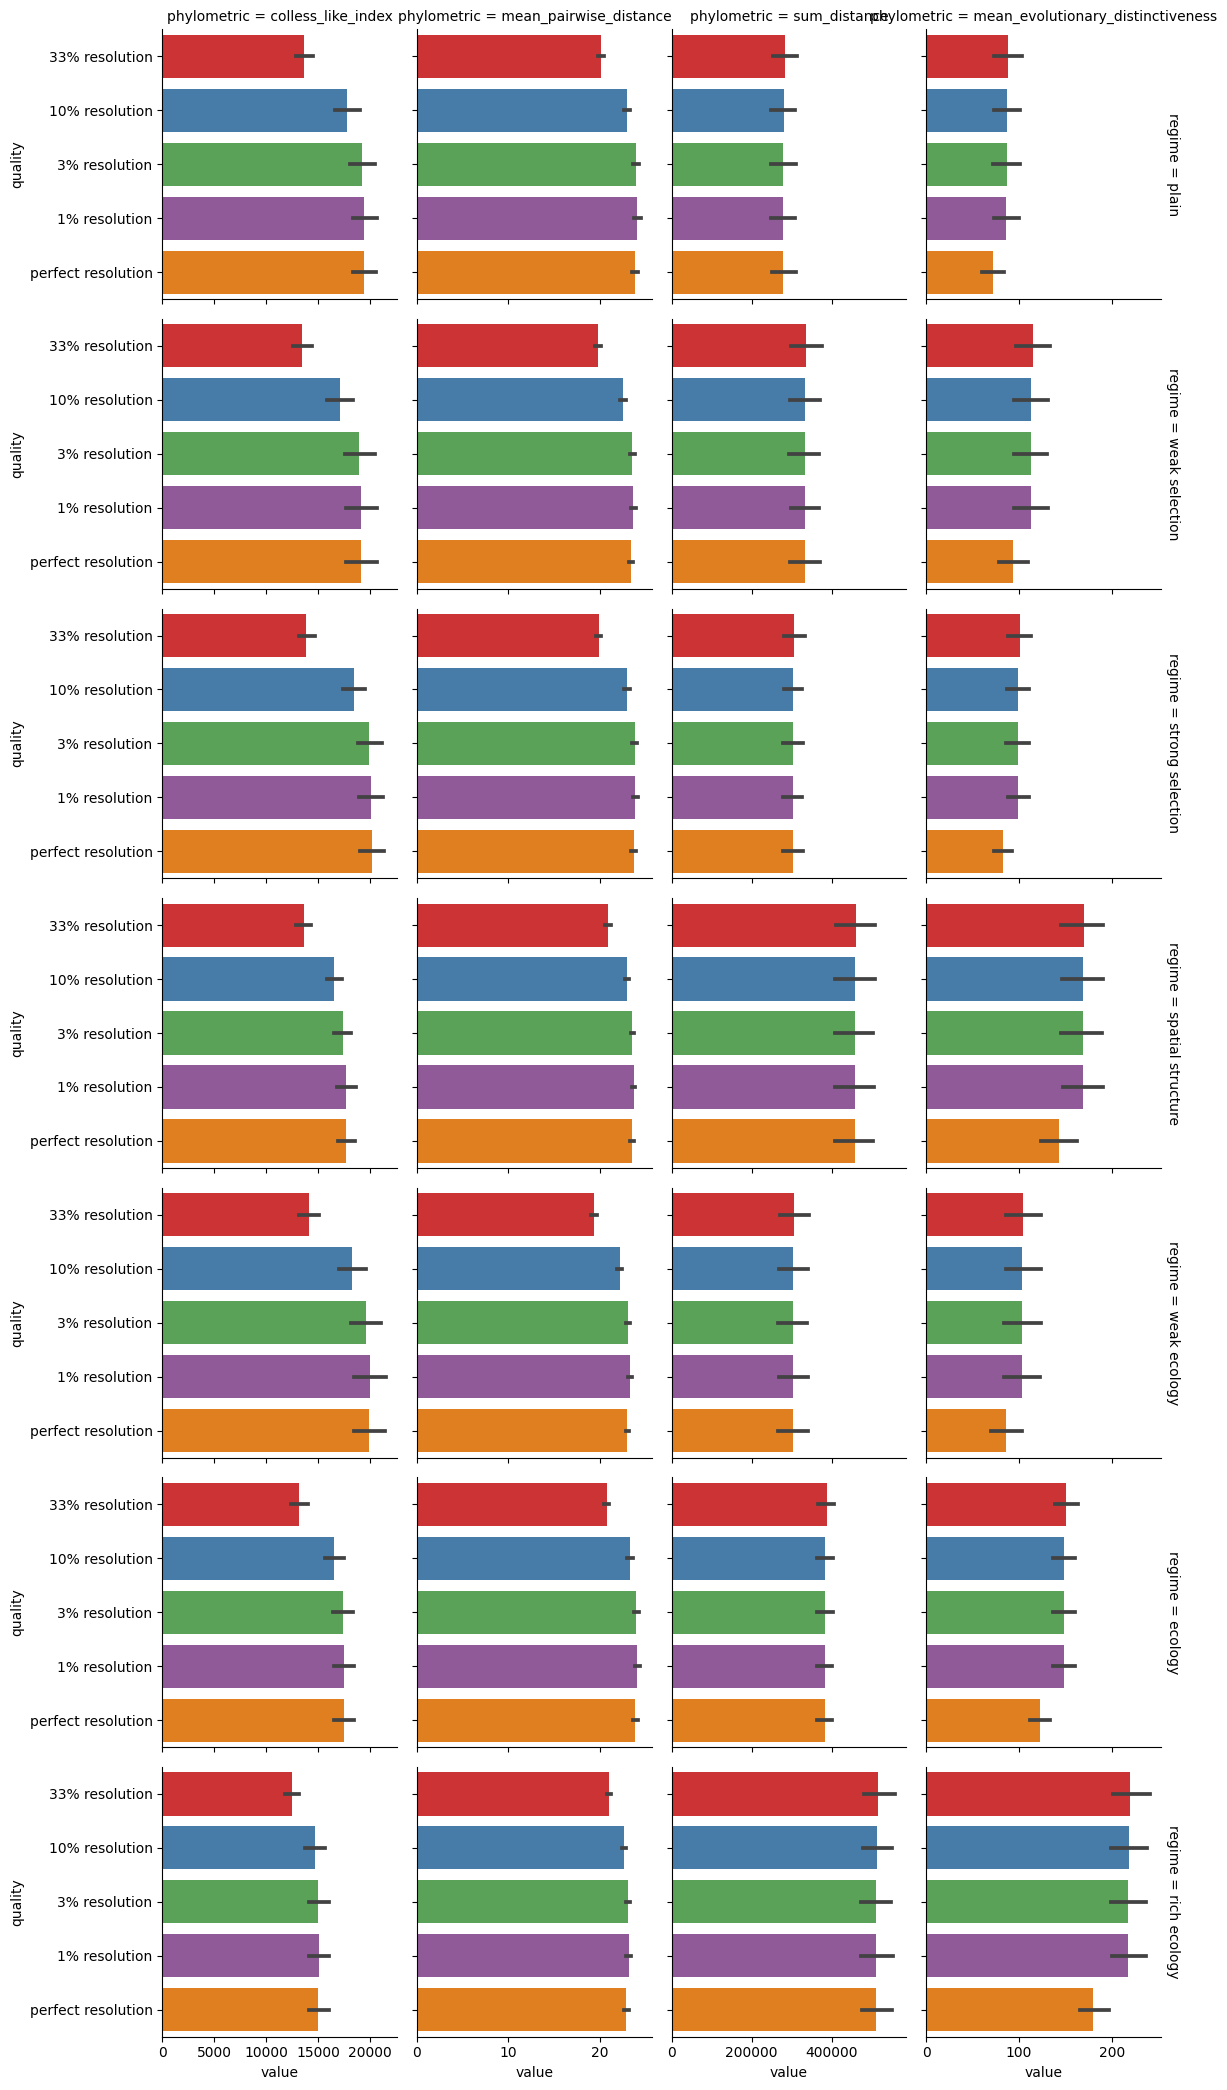

teeplots/col=phylometric+epoch=0+mut_distn=default+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=default+row=regime+viz=boxplot+x=value+y=quality+ext=.png


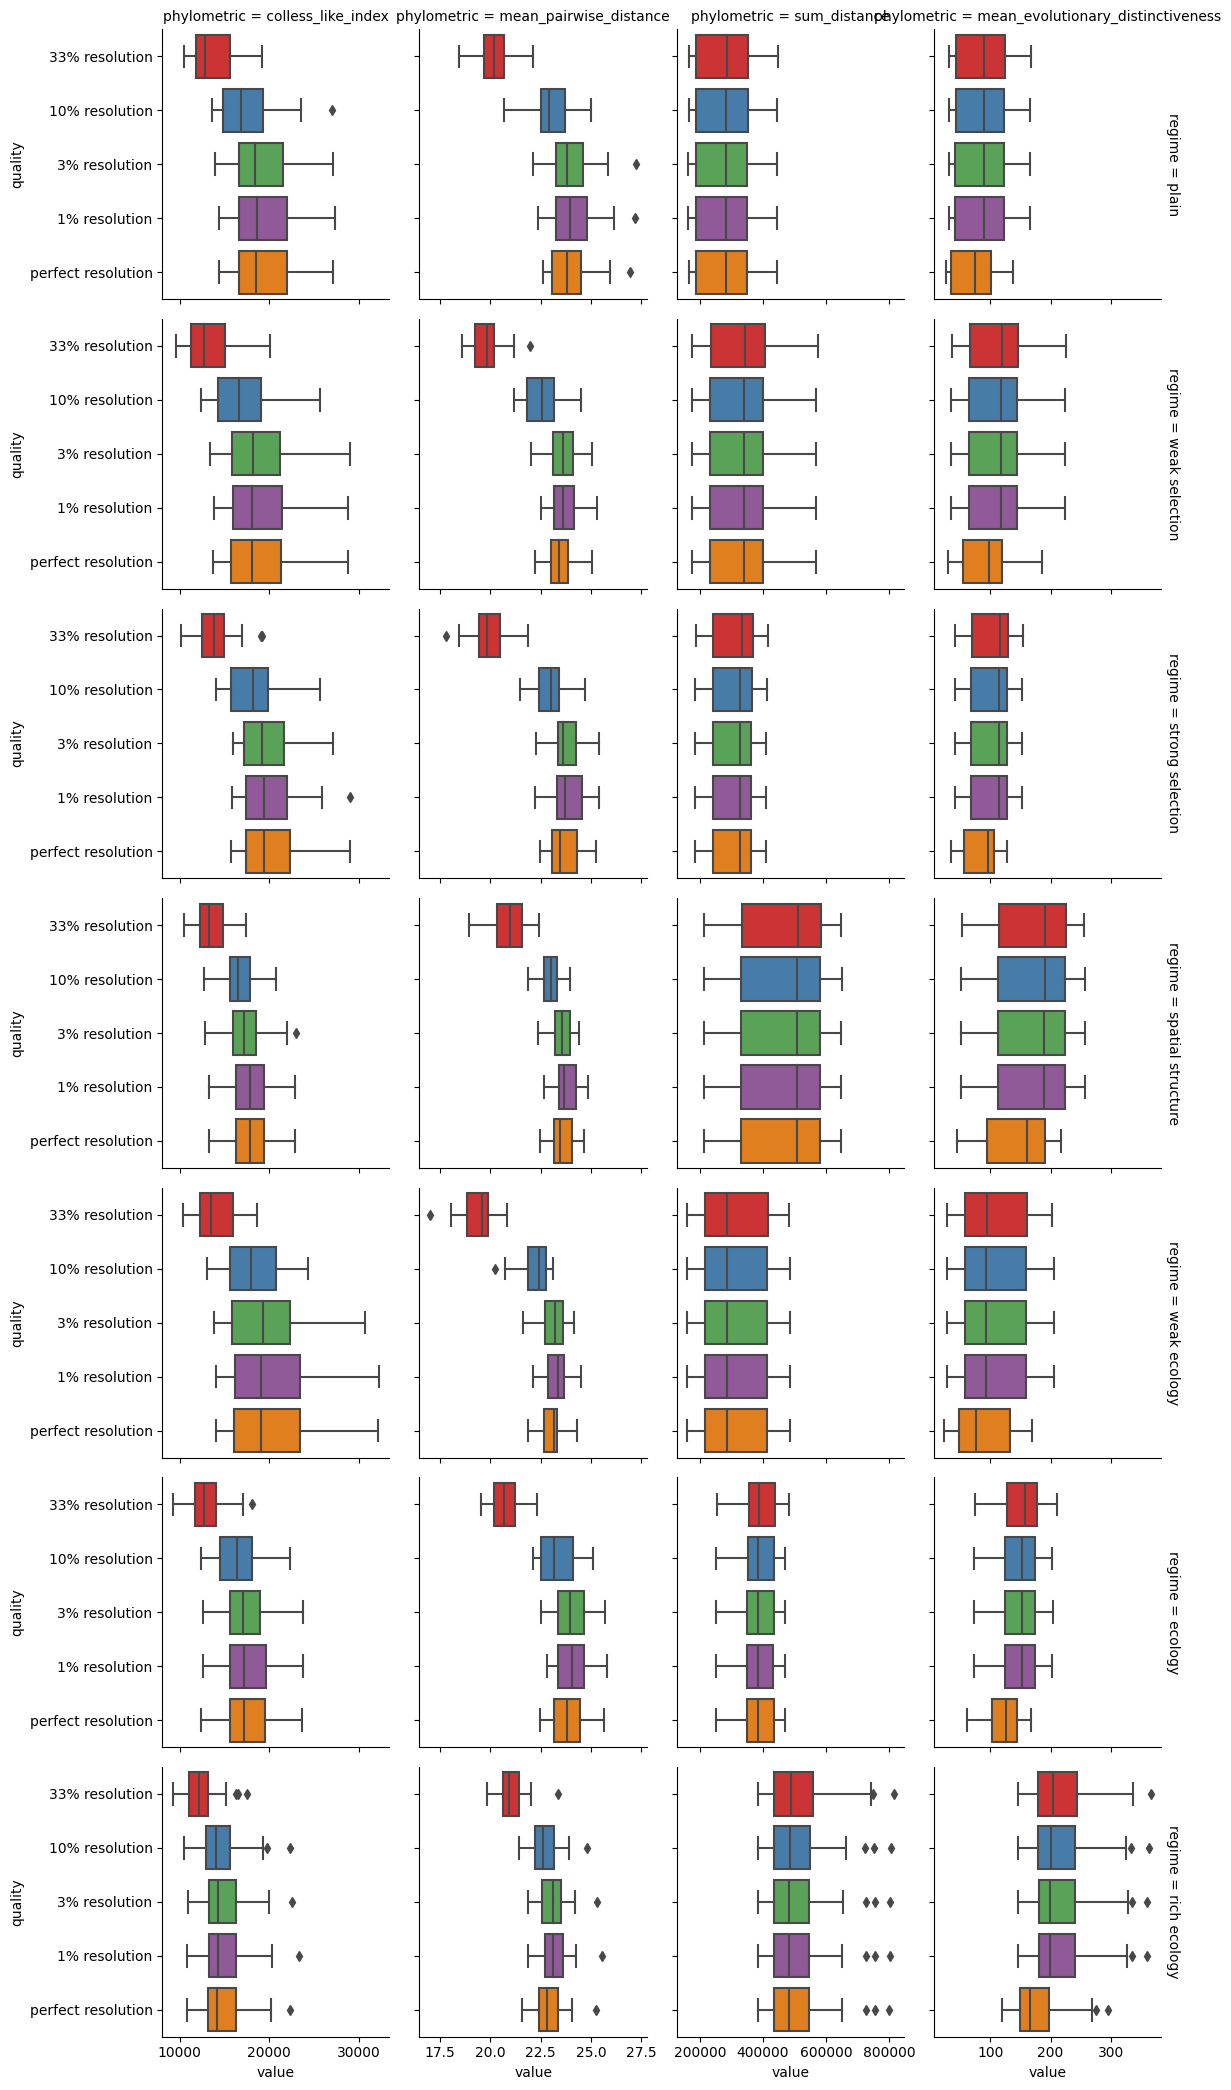

teeplots/col=phylometric+epoch=0+mut_distn=default+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=default+row=regime+viz=violinplot+x=value+y=quality+ext=.png


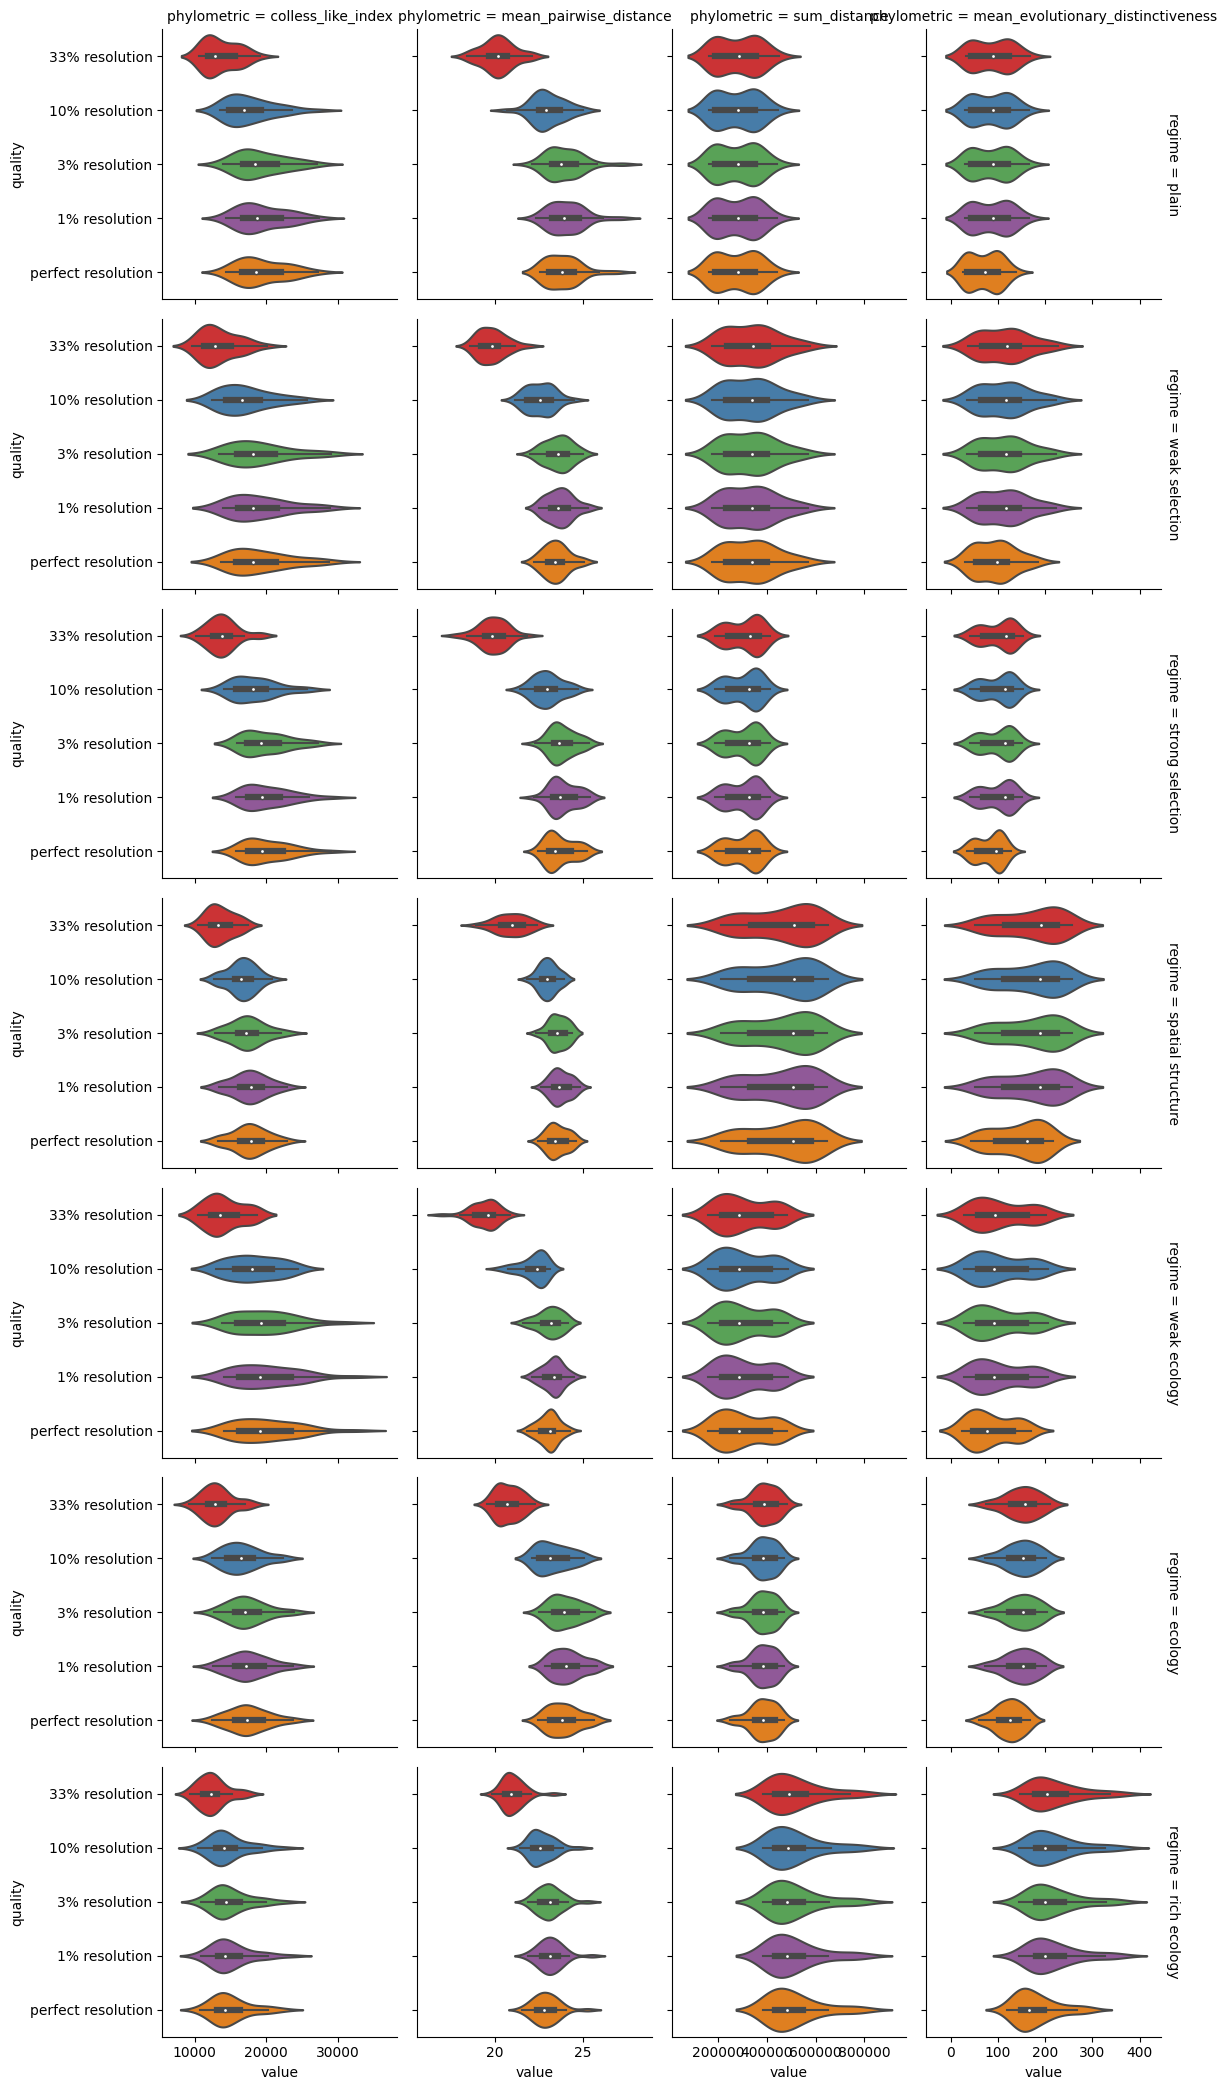

In [15]:
def make_do_plot(plotter):
    def do_plot(data, col, row, x, y):
        g = sns.FacetGrid(
            data,
            col=col,
            row=row,
            row_order=[
                "plain",
                "weak selection",
                "strong selection",
                "spatial structure",
                "weak ecology",
                "ecology",
                "rich ecology",
            ],
            sharex="col",
            margin_titles=True,
        )
        g.map(
            plotter,
            x,
            y,
            order=[
                "33% resolution",
                "10% resolution",
                "3% resolution",
                "1% resolution",
                "perfect resolution",
            ],
            palette=sns.color_palette("Set1", 5),
        )

    return do_plot


for viz, (group, group_df) in it.product(
    [
        sns.barplot,
        sns.boxplot,
        sns.violinplot,
    ],
    melted_df.groupby(sensitivity_analysis_variables),
):
    do_plot = make_do_plot(viz)
    do_plot.__name__ = viz.__name__
    tp.tee(
        do_plot,
        data=group_df,
        col="phylometric",
        row="regime",
        x="value",
        y="quality",
        teeplot_outattrs=dict(
            zip(sensitivity_analysis_variables, group),
        ),
    )


# regime heatmap signatures

cliff's delta


teeplots/epoch=0+mut_distn=default+resolution=3.0+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=0+mut_distn=default+resolution=3.0+viz=heatmap+x=regime+y=phylometric+ext=.png


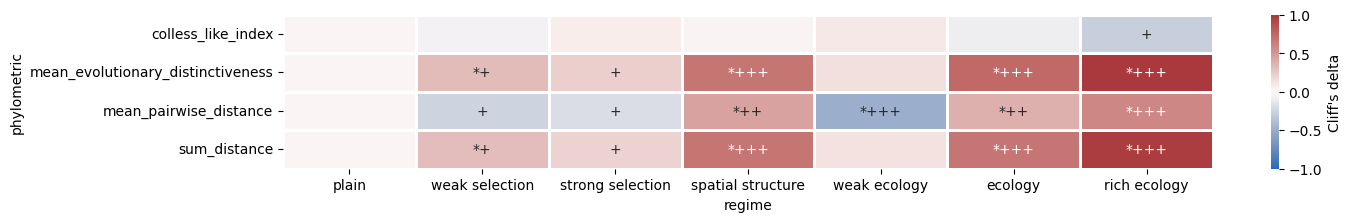

teeplots/epoch=0+mut_distn=default+resolution=10.0+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=0+mut_distn=default+resolution=10.0+viz=heatmap+x=regime+y=phylometric+ext=.png


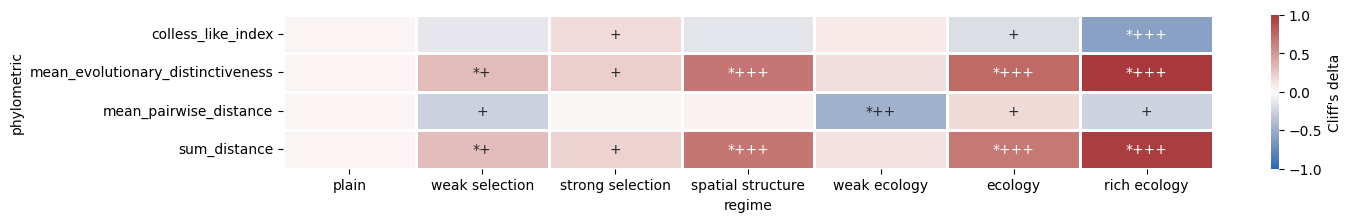

teeplots/epoch=0+mut_distn=default+resolution=33.0+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=0+mut_distn=default+resolution=33.0+viz=heatmap+x=regime+y=phylometric+ext=.png


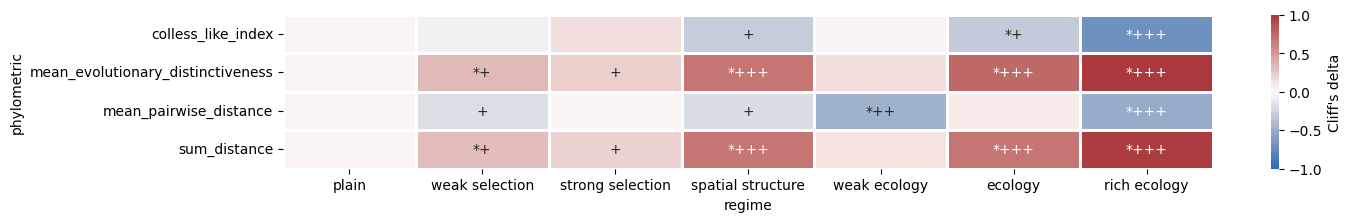

teeplots/epoch=0+mut_distn=default+resolution=100.0+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=0+mut_distn=default+resolution=100.0+viz=heatmap+x=regime+y=phylometric+ext=.png


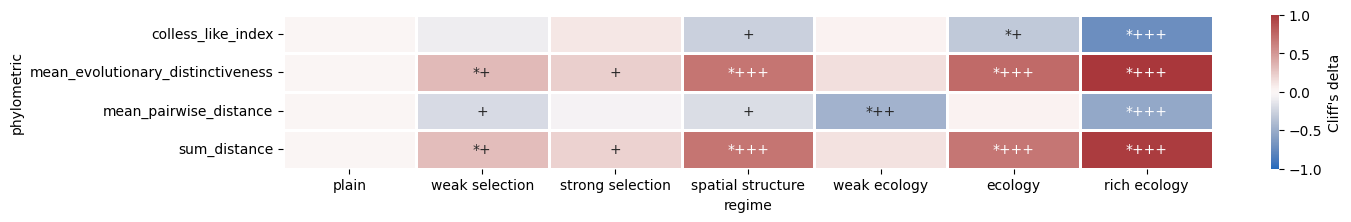

In [16]:
group_variables = sensitivity_analysis_variables + ["resolution"]
for (group, group_df) in df[
    df["regime"].isin(
        [
            "plain",
            "weak selection",
            "strong selection",
            "spatial structure",
            "weak ecology",
            "ecology",
            "rich ecology",
        ],
    )
].groupby(
    group_variables,
):

    fil = (
        group_df[group_df["a"] == "reconstructed-tree"]
        .copy()
        .dropna(subset=["regime"])
    )

    melted_df = fil.melt(
        id_vars=["regime"],
        value_vars=phylometrics,
    )
    melted_df["phylometric"] = melted_df["variable"]

    def calc_cliffs_delta(group) -> float:
        phylometric, regime = group.name
        return -cliffs_delta(
            fil[fil["regime"] == "plain"][phylometric],
            fil[fil["regime"] == regime][phylometric],
        )[0]

    melted_df = melted_df.groupby(["phylometric", "regime"]).apply(
        calc_cliffs_delta,
    ).reset_index(name="value")

    fig, ax = plt.subplots(figsize=(15, 2))

    matrix = melted_df.pivot(
        index="phylometric",
        columns="regime",
        values="value",
    )
    matrix = matrix[
        sorted(
            matrix.columns,
            key=[
                "plain",
                "weak selection",
                "strong selection",
                "spatial structure",
                "weak ecology",
                "ecology",
                "rich ecology",
            ].index,
        )
    ]

    annot = []
    for metric, row in matrix.iterrows():

        def getvec(regime: str) -> np.array:
            return fil[fil["regime"] == regime][metric].to_numpy()

        annot.append(
            [
                describe_effect(getvec("plain"), getvec(regime))
                for regime in matrix.columns
            ],
        )

    tp.tee(
        sns.heatmap,
        matrix,
        annot=annot,
        fmt="",
        linewidths=2,
        cmap=sns.color_palette("vlag", as_cmap=True),
        center=0,
        cbar_kws={"label": "Cliff's delta"},
        teeplot_outattrs={
            **dict(
                zip(group_variables, group),
            ),
            **{
                "x": "regime",
                "y": "phylometric",
            },
        },
        teeplot_outexclude=["fmt"],
        vmin=-1,
        vmax=1,
    )


# stats: comparison against perfect quality


In [17]:
records = []
for phylometric in phylometrics:
    for group, group_df in df.groupby(
        ["regime", *sensitivity_analysis_variables], as_index=False
    ):
        for quality in group_df["quality"].unique():
            if quality == "perfect resolution":
                continue
            kw_result, n = scipy_stats.wilcoxon(
                group_df[group_df["quality"] == "perfect resolution"][
                    phylometric
                ],
                group_df[group_df["quality"] == quality][phylometric],
            ), ip.pophomogeneous(group_df.groupby(["quality"]).count()["a"])
            records.append(
                {
                    **{"quality": quality, "n": n, "phylometric": phylometric},
                    **dict(zip(["statistic", "p"], kw_result)),
                    **dict(
                        zip(["regime", *sensitivity_analysis_variables], group)
                    ),
                }
            )

with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    out_df = (
        pd.DataFrame.from_records(records)
        .sort_values(
            [*sensitivity_analysis_variables, "regime", "phylometric"],
        )
        .reset_index(drop=True)
    )
    display(out_df)
    os.makedirs("outdata", exist_ok=True)
    out_df.to_csv(
        "outdata/a=phylostatistics-comparison-between-resolutions-allpairs-wilcox+ext=.csv",
        index=False,
    )


,quality,n,phylometric,statistic,p,regime,epoch,mut_distn
0,10% resolution,30,colless_like_index,186.0,0.338856,ecology,0,default
1,33% resolution,30,colless_like_index,15.0,0.000008,ecology,0,default
2,3% resolution,30,colless_like_index,221.0,0.813017,ecology,0,default
3,1% resolution,30,colless_like_index,224.0,0.861213,ecology,0,default
4,10% resolution,30,mean_evolutionary_distinctiveness,99.0,0.006035,ecology,0,default
5,33% resolution,30,mean_evolutionary_distinctiveness,67.0,0.000664,ecology,0,default
6,3% resolution,30,mean_evolutionary_distinctiveness,90.0,0.003379,ecology,0,default
7,1% resolution,30,mean_evolutionary_distinctiveness,90.0,0.003379,ecology,0,default
8,10% resolution,30,mean_pairwise_distance,134.0,0.042767,ecology,0,default
9,33% resolution,30,mean_pairwise_distance,0.0,0.000002,ecology,0,default


teeplots/epoch=0+hue=quality-threshold+mut_distn=default+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=0+hue=quality-threshold+mut_distn=default+viz=heatmap+x=regime+y=phylometric+ext=.png


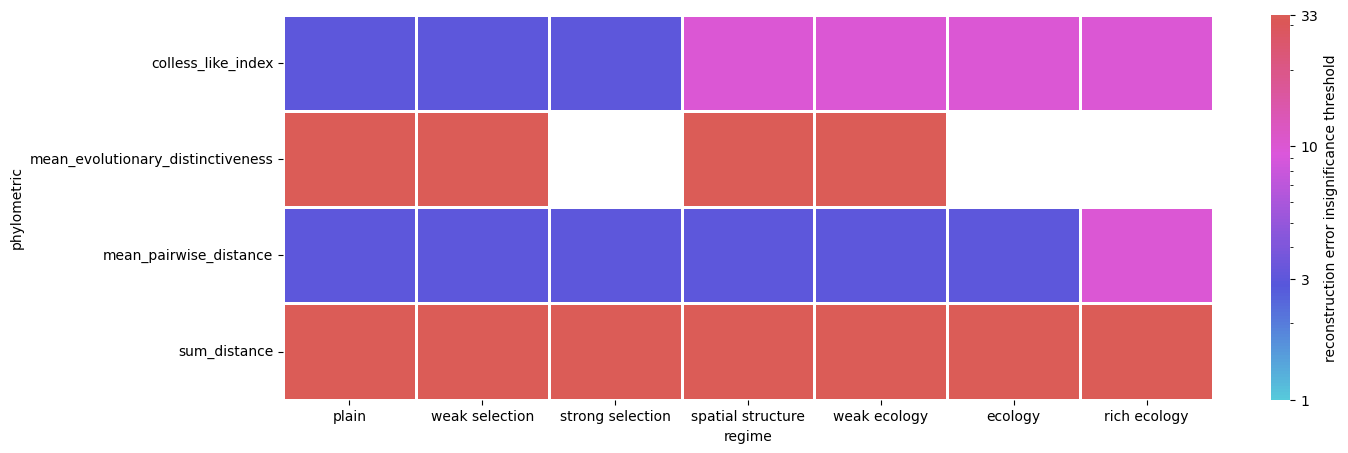

,regime,phylometric,quality threshold,epoch,mut_distn
0,ecology,colless_like_index,10.0,0,default
1,ecology,mean_evolutionary_distinctiveness,NaN,0,default
2,ecology,mean_pairwise_distance,3.0,0,default
3,ecology,sum_distance,33.0,0,default
4,plain,colless_like_index,3.0,0,default
5,plain,mean_evolutionary_distinctiveness,33.0,0,default
6,plain,mean_pairwise_distance,3.0,0,default
7,plain,sum_distance,33.0,0,default
8,rich ecology,colless_like_index,10.0,0,default
9,rich ecology,mean_evolutionary_distinctiveness,NaN,0,default


In [18]:
for group, group_df in out_df[
    out_df["regime"].isin(
        [
            "plain",
            "weak selection",
            "strong selection",
            "spatial structure",
            "weak ecology",
            "ecology",
            "rich ecology",
        ],
    )
].groupby(
    sensitivity_analysis_variables, as_index=False
):
    group_df["quality threshold"] = group_df["quality"]
    group_df.loc[group_df["p"] > 0.05, "quality threshold"] = ""
    summarized_df = (
        group_df.groupby(["regime", "phylometric"])
        .agg(
            {
                "quality threshold": lambda subgroup: (
                    np.nan
                    if "1% resolution" in set(subgroup)
                    else 1
                    if "3% resolution" in set(subgroup)
                    else 3
                    if "10% resolution" in set(subgroup)
                    else 10
                    if "33% resolution" in set(subgroup)
                    else 33
                ),
                "epoch": lambda subgroup: ip.pophomogeneous(subgroup),
                "mut_distn": lambda subgroup: ip.pophomogeneous(subgroup),
            }
        )
        .reset_index()
    )

    matrix = summarized_df.pivot(
        index="phylometric",
        columns="regime",
        values="quality threshold",
    )
    matrix = matrix[
        sorted(
            matrix.columns,
            key=[
                "plain",
                "weak selection",
                "strong selection",
                "spatial structure",
                "weak ecology",
                "ecology",
                "rich ecology",
            ].index,
        )
    ]

    fig, ax = plt.subplots(figsize=(15, 5))
    formatter = mpl.ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    tp.tee(
        sns.heatmap,
        matrix,
        linewidths=2,
        norm=mpl.colors.LogNorm(vmin=1, vmax=33),
        cmap=sns.color_palette("hls", as_cmap=True),
        center=0,
        cbar_kws={
            "label": "reconstruction error insignificance threshold",
            "ticks": [1, 3, 10, 33],
            "format": formatter,
        },
        teeplot_outattrs={
            **dict(
                zip(sensitivity_analysis_variables, group),
            ),
            **{
                "hue": "quality-threshold",
                "x": "regime",
                "y": "phylometric",
            },
        },
        vmin=1,
        vmax=33,
    )

summarized_df
